In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#!head -2 train.csv

In [3]:
train = pd.read_csv(open('train.csv'), sep = ',')
test = pd.read_csv(open('test.csv'), sep = ',')

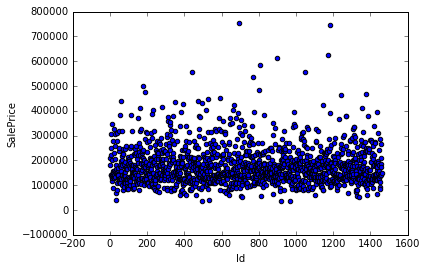

In [4]:
#Scatter plot of Id vs Sale Price
data = train[['Id','SalePrice']].values
#Plot part
plt.scatter(data[:,0],data[:,1]);
plt.xlabel('Id');
plt.ylabel('SalePrice');

In [5]:
type(train),type(test)


(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [6]:
train.isnull().values.any(),train.isnull().sum().sum()

(True, 6965)

In [7]:
#Concat train and test data so as to avoid mismatch of number of features after applying pandas_dataframe.get_dummies
train_test_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],test.loc[:,'MSSubClass':'SaleCondition']))

In [8]:
#Convert categorical variable into dummy/indicator variables
train_test_data = pd.get_dummies(train_test_data)

In [9]:
type(train_test_data), type(train)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [10]:
train_rows = int(train.shape[0] * 0.8)
val_rows = train.shape[0] - train_rows
train_rows, val_rows

(1168, 292)

In [11]:
#train_test_data.iloc[:train_rows,:]

In [12]:
#Train partition
xTrain = train_test_data.iloc[:train_rows,:]
tTrain = train.loc[:train_rows -1 ,'SalePrice']

#Validation partition
vTrain = train_test_data.iloc[train_rows:train.shape[0],:]
vtTrain = train.loc[train_rows:train.shape[0],'SalePrice']

#xTest partition
xTest = train_test_data.iloc[train.shape[0]:,:]

In [13]:
train_test_data.shape, xTrain.shape, tTrain.shape, vTrain.shape, vtTrain.shape, xTest.shape

((2919, 288), (1168, 288), (1168,), (292, 288), (292,), (1459, 288))

In [14]:
'''[Need to rethink on imputation]'''

# Train :filling NA's with the mean of the column 
xTrain = xTrain.fillna(xTrain.mean())
tTrain = tTrain.fillna(tTrain.mean())

# Validation :filling NA's with the mean of the column 
vTrain = vTrain.fillna(vTrain.mean())
vtTrain = vtTrain.fillna(vtTrain.mean())



#Test : filling NA's with the mean of the column:
xTest = xTest.fillna(xTest.mean())


In [15]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
'''
The value of n_estimators is kept high so as to have stability of RandomForest; 
If we take lower values of n_estimotros, we'll observe the variation in importance 
of features calculated next.
'''
clf = RandomForestClassifier(n_estimators=500)
clf = clf.fit(xTrain,tTrain)

In [16]:
'''Get names of the features of entire data'''
names = list(train_test_data.columns.values)
'''Get the feature importance of RandomForestClassifier'''
importances = clf.feature_importances_
#print len(importance)

In [17]:
'''Map sorted feature importance and names of features'''
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), importances),names), 
             reverse=True)


Features sorted by their score:
[(0.0275, 'GrLivArea'), (0.0271, 'LotArea'), (0.0267, '1stFlrSF'), (0.0263, 'BsmtUnfSF'), (0.0262, 'TotalBsmtSF'), (0.0259, 'GarageArea'), (0.0236, 'LotFrontage'), (0.0233, 'YearBuilt'), (0.0233, 'GarageYrBlt'), (0.0225, 'MoSold'), (0.0217, 'BsmtFinSF1'), (0.0214, 'YearRemodAdd'), (0.0193, 'OpenPorchSF'), (0.0177, 'WoodDeckSF'), (0.0172, 'YrSold'), (0.0169, 'TotRmsAbvGrd'), (0.0164, 'MasVnrArea'), (0.0148, '2ndFlrSF'), (0.0142, 'OverallQual'), (0.012, 'OverallCond'), (0.0113, 'BedroomAbvGr'), (0.0107, 'MSSubClass'), (0.0094, 'Fireplaces'), (0.0079, 'GarageCars'), (0.0079, 'BsmtFullBath'), (0.0074, 'LotShape_Reg'), (0.0072, 'EnclosedPorch'), (0.0071, 'LotShape_IR1'), (0.007, 'LotConfig_Inside'), (0.0065, 'BsmtExposure_No'), (0.0064, 'HalfBath'), (0.0063, 'GarageFinish_RFn'), (0.0062, 'MasVnrType_None'), (0.0062, 'BsmtFinType1_Unf'), (0.0061, 'BsmtFinSF2'), (0.006, 'MasVnrType_BrkFace'), (0.006, 'FireplaceQu_Gd'), (0.0058, 'ScreenPorch'), (0.0057, 'LotConf

Feature ranking:


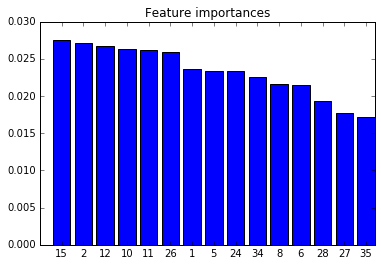

In [36]:
'''Plot feature names vs feature importance importances = clf.feature_importances_'''

indices = np.argsort(importances)[::-1]

'''Print the feature ranking'''
print("Feature ranking:")

'''
for f in range(xTrain.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

for f in range(xTrain.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
'''

'''Plot the feature importances of the forest'''
plt.figure()
plt.title("Feature importances")
plt.bar(range(xTrain.shape[1]), importances[indices],
       color="b", align="center")
plt.xticks(range(xTrain.shape[1]), indices)
plt.xlim([-1, xTrain.shape[1]*0.05])
plt.show()


In [19]:
'''Validation'''
val_prediction = clf.predict(vTrain)
val_prediction.shape

(292,)

In [28]:
vtTrain_actual = vtTrain.to_frame().loc[:,'SalePrice'].values
len(vtTrain_actual), len(val_prediction)

(292, 292)

In [21]:
type(vtTrain_actual), type(val_prediction)

(numpy.ndarray, numpy.ndarray)

In [22]:
vtTrain_actual.shape, val_prediction.shape

((292,), (292,))

In [23]:
'''Accuracy score'''
from sklearn.metrics import accuracy_score
print "Accuracy", accuracy_score(vtTrain_actual, val_prediction)

Accuracy 0.0102739726027


In [29]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print "Accuracy", sqrt(mean_squared_error(val_prediction, vtTrain_actual, multioutput='raw_values'))

Accuracy 35793.2700903


In [32]:
'''Testing'''
test_prediction = clf.predict(xTest)
test_prediction

array([119900, 151500, 192000, ..., 141000,  93500, 187500])